In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 230 GB / percent used: 8.8 %


# Check the surface variables first
In particular the snow cover

In [2]:
path = '/data/mlalande/gpfsstore/rech/lmd/rlmd007/IGCM_OUT/LMDZOR/TEST/clim/TEST-RELIEF-00/SRF/Output/MO'

In [3]:
!ls {path}

TEST-RELIEF-00_19950101_19951231_1M_sechiba_history.nc
TEST-RELIEF-00_19960101_19961231_1M_sechiba_history.nc
TEST-RELIEF-00_19970101_19971231_1M_sechiba_history.nc
TEST-RELIEF-00_19980101_19981231_1M_sechiba_history.nc
TEST-RELIEF-00_19990101_19991231_1M_sechiba_history.nc
TEST-RELIEF-00_20000101_20001231_1M_sechiba_history.nc
TEST-RELIEF-00_20010101_20011231_1M_sechiba_history.nc
TEST-RELIEF-00_20020101_20021231_1M_sechiba_history.nc
TEST-RELIEF-00_20030101_20031231_1M_sechiba_history.nc
TEST-RELIEF-00_20040101_20041231_1M_sechiba_history.nc


# Get the snow cover
Attention calendrier 360d

In [4]:
latlim=(10,50)
lonlim=(60,110)

var_label = 'Snow cover extent [%]'
cmap='viridis'
levels=plot.arange(0,100,10)

In [5]:
ds = xr.open_mfdataset(path+'/*.nc', combine='by_coords')

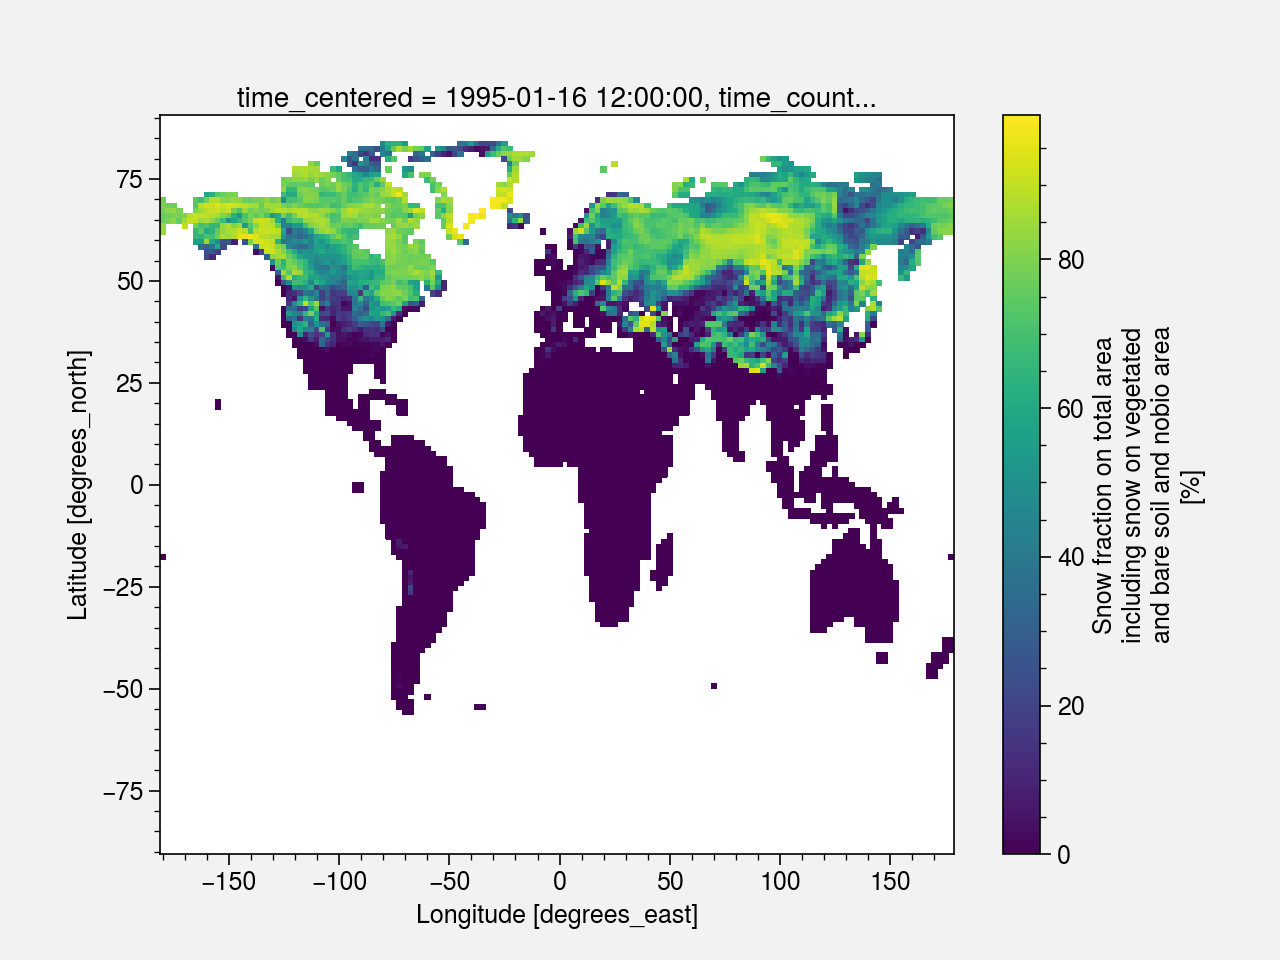

In [6]:
ds.frac_snow[0].plot()

In [7]:
ds_HMA = ds.sel(lat=slice(50,10), lon=slice(60,110))

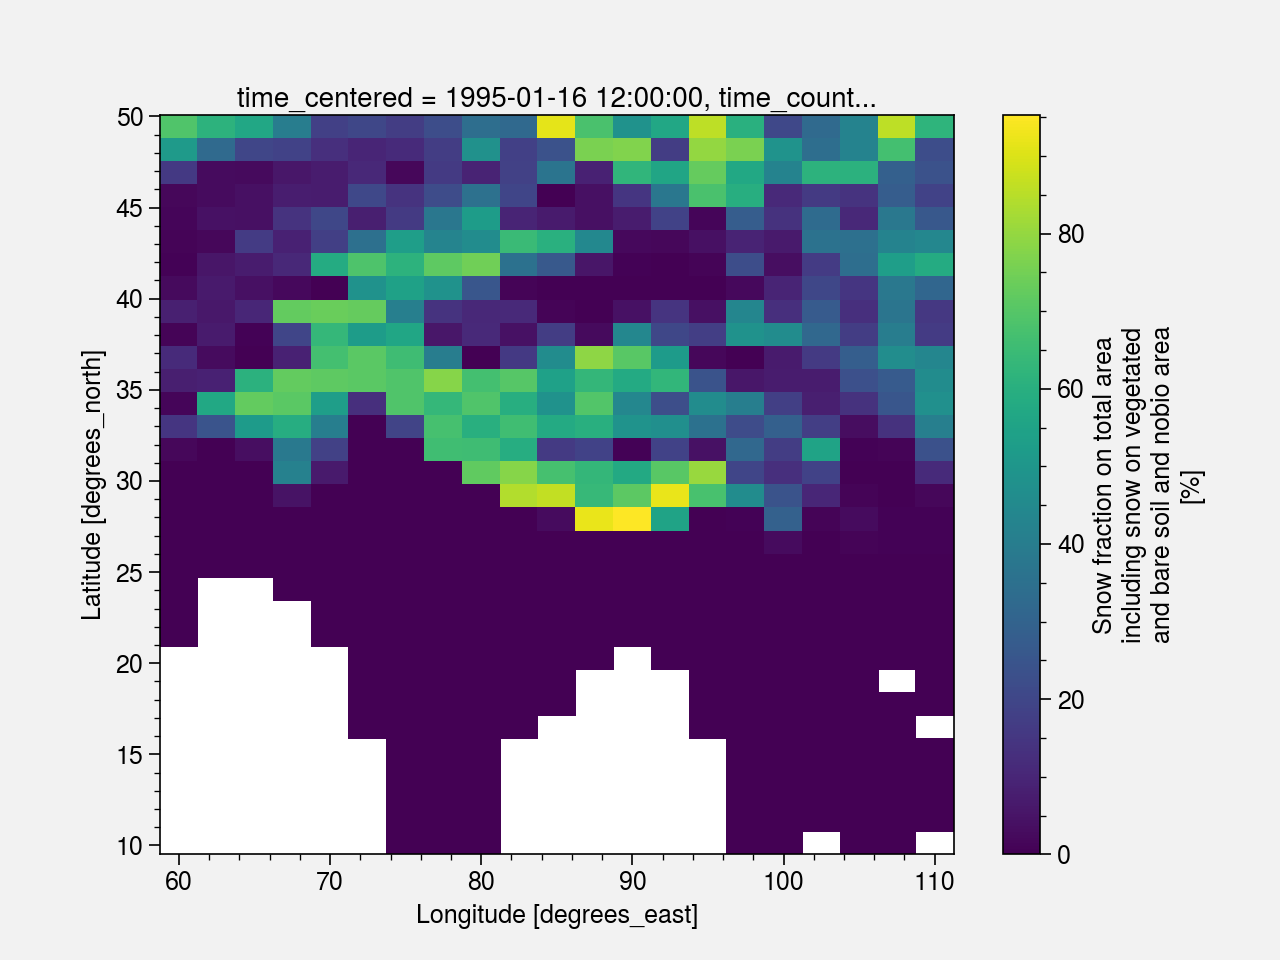

In [8]:
ds_HMA.frac_snow[0].plot()

# Let's target some 100% pixels
http://localhost:7227/notebooks/notebooks/CICLAD/Himalaya/CMIP6_IPSL_bias/Snow%20cover.ipynb

In [9]:
ds_HMA.frac_snow

<xarray.DataArray 'frac_snow' (time_counter: 120, lat: 32, lon: 21)>
dask.array<getitem, shape=(120, 32, 21), dtype=float32, chunksize=(12, 32, 21), chunktype=numpy.ndarray>
Coordinates:
  * lon            (lon) float32 60.0 62.5 65.0 67.5 ... 102.5 105.0 107.5 110.0
  * lat            (lat) float32 49.43662 48.169014 ... 11.408451 10.140845
    time_centered  (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter   (time_counter) object 1995-01-16 12:00:00 ... 2004-12-16 12:00:00
Attributes:
    long_name:           Snow fraction on total area including snow on vegeta...
    units:               %
    online_operation:    average
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 900 s)

## Choose pixels

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


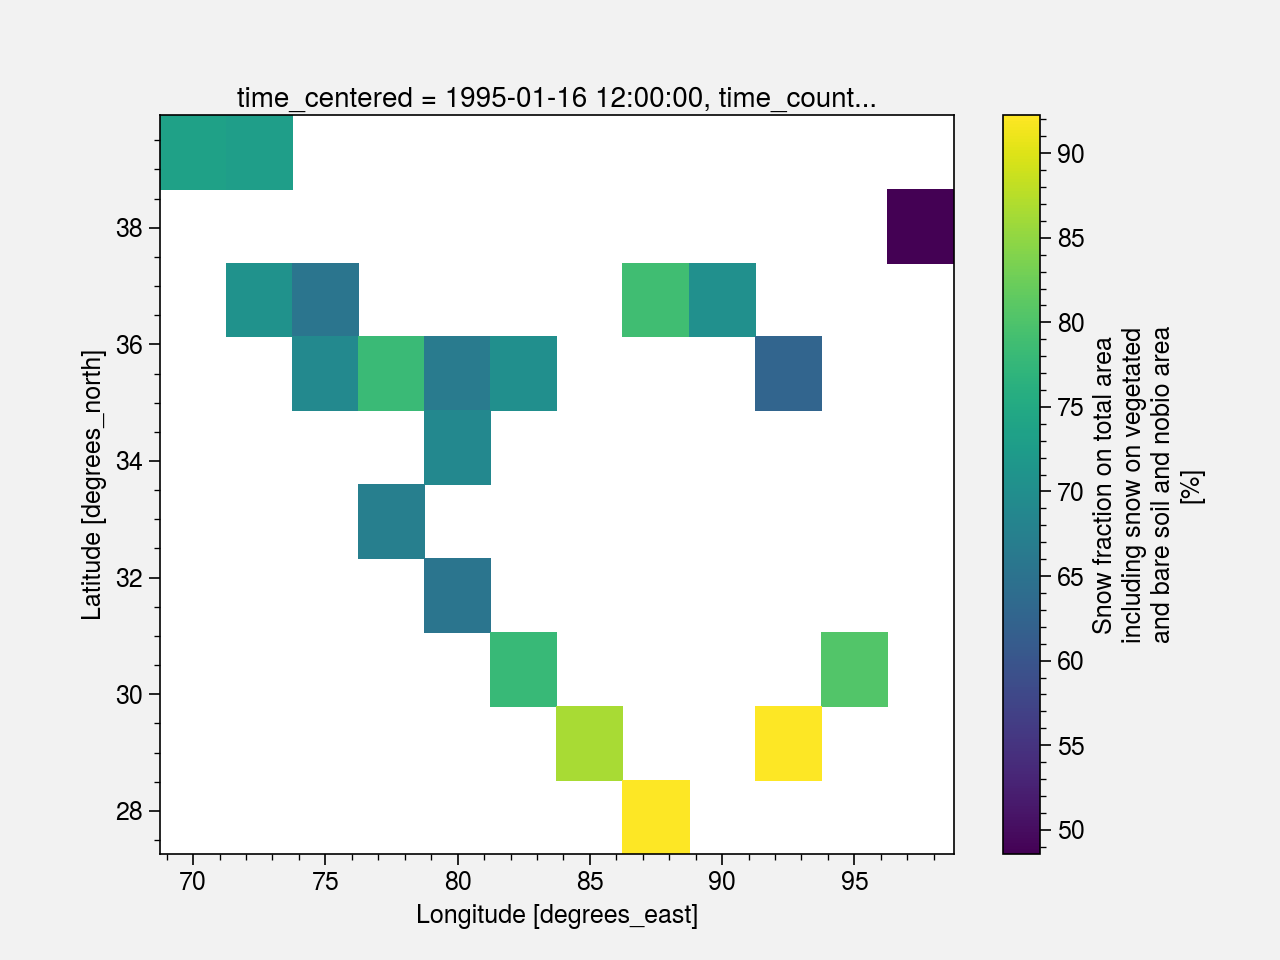

In [11]:
ds_HMA.frac_snow[0].where(ds_HMA.frac_snow.sel(time_counter=slice('2000', '2004')).mean('time_counter') == 100, drop=True).plot()

In [12]:
ds_HMA.frac_snow[0].where(ds_HMA.frac_snow.sel(time_counter=slice('2000', '2004')).mean('time_counter') == 100, drop=True)[-2, 4]

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'frac_snow' ()>
dask.array<getitem, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    lon            float32 80.0
    lat            float32 29.15493
    time_centered  int64 dask.array<chunksize=(), meta=np.ndarray>
    time_counter   object 1995-01-16 12:00:00
Attributes:
    long_name:           Snow fraction on total area including snow on vegeta...
    units:               %
    online_operation:    average
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 900 s)

## Plots them

In [13]:
# 3 100% points Karakoram, north-est, Himalaya
lat_100 = [35.492958, 29.15493, 29.15493, 38.028168]
lon_100 = [77.5, 82.5, 85.0, 97.5]
dx = 2.5
dy = 1.2676

In [14]:
def select_pixels(axs, lat, lon, dx, dy):
    for ax in axs:
        for i in range(len(lat)):
            ax.add_patch(
                Rectangle(
                    xy=[lon[i]-dx/2, lat[i]-dy/2], width=dx, height=dy, 
                    fill=False, color='C'+str(i), lw=4
                )
            )

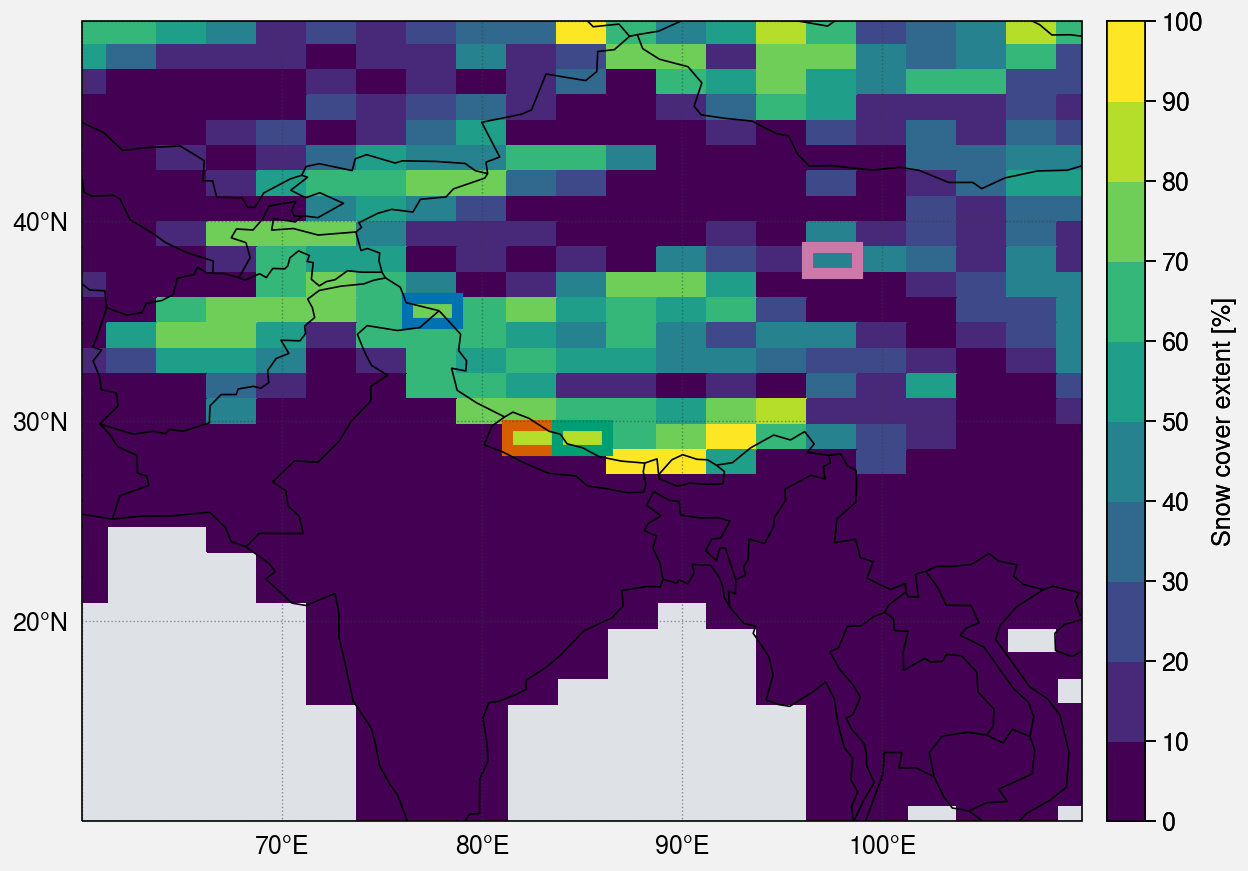

In [15]:
f, axs = plot.subplots(ncols=1, nrows=1, proj='cyl', axwidth=5)

m = axs[0].pcolormesh(ds_HMA.frac_snow[0], cmap=cmap, levels=levels)
axs[0].format(title='')
f.colorbar(m, label=var_label)

select_pixels(axs, lat_100, lon_100, dx, dy)

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
#     suptitle="",
    lonlines=10, latlines=10, abc=False, latlim=latlim, lonlim=lonlim
)

# f.save('.png')
# f.save('.pdf')

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


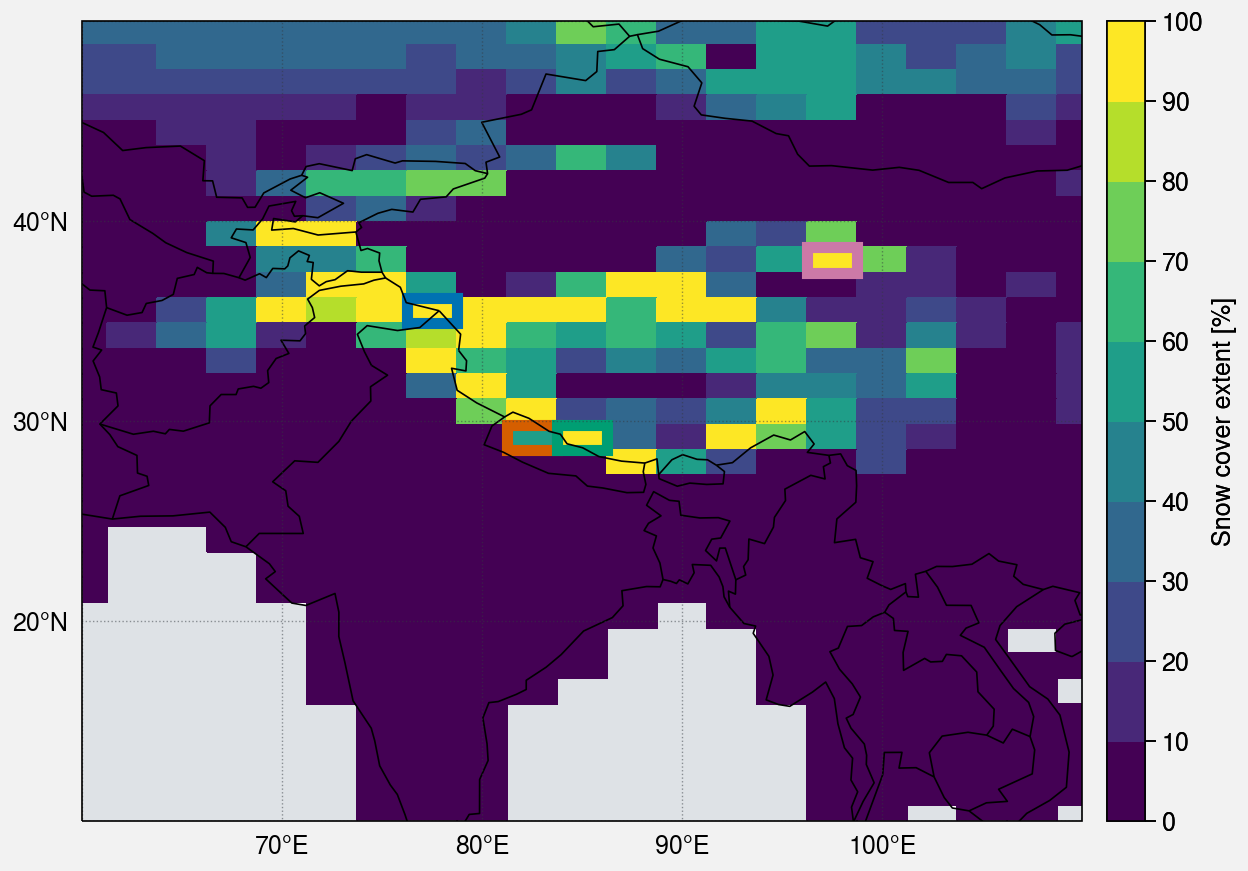

In [17]:
clim_end = ds_HMA.frac_snow.sel(time_counter=slice('2000', '2004')).mean('time_counter')

f, axs = plot.subplots(ncols=1, nrows=1, proj='cyl', axwidth=5)

m = axs[0].pcolormesh(clim_end, cmap=cmap, levels=levels)
axs[0].format(title='')
f.colorbar(m, label=var_label)

select_pixels(axs, lat_100, lon_100, dx, dy)

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
#     suptitle="",
    lonlines=10, latlines=10, abc=False, latlim=latlim, lonlim=lonlim
)

## Let's plot the time series of these pixels

In [22]:
ds_HMA.tair

<xarray.DataArray 'tair' (time_counter: 120, lat: 32, lon: 21)>
dask.array<getitem, shape=(120, 32, 21), dtype=float32, chunksize=(12, 32, 21), chunktype=numpy.ndarray>
Coordinates:
  * lon            (lon) float32 60.0 62.5 65.0 67.5 ... 102.5 105.0 107.5 110.0
  * lat            (lat) float32 49.43662 48.169014 ... 11.408451 10.140845
    time_centered  (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter   (time_counter) object 1995-01-16 12:00:00 ... 2004-12-16 12:00:00
Attributes:
    long_name:           Air Temperature
    units:               K
    online_operation:    average
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 900 s)

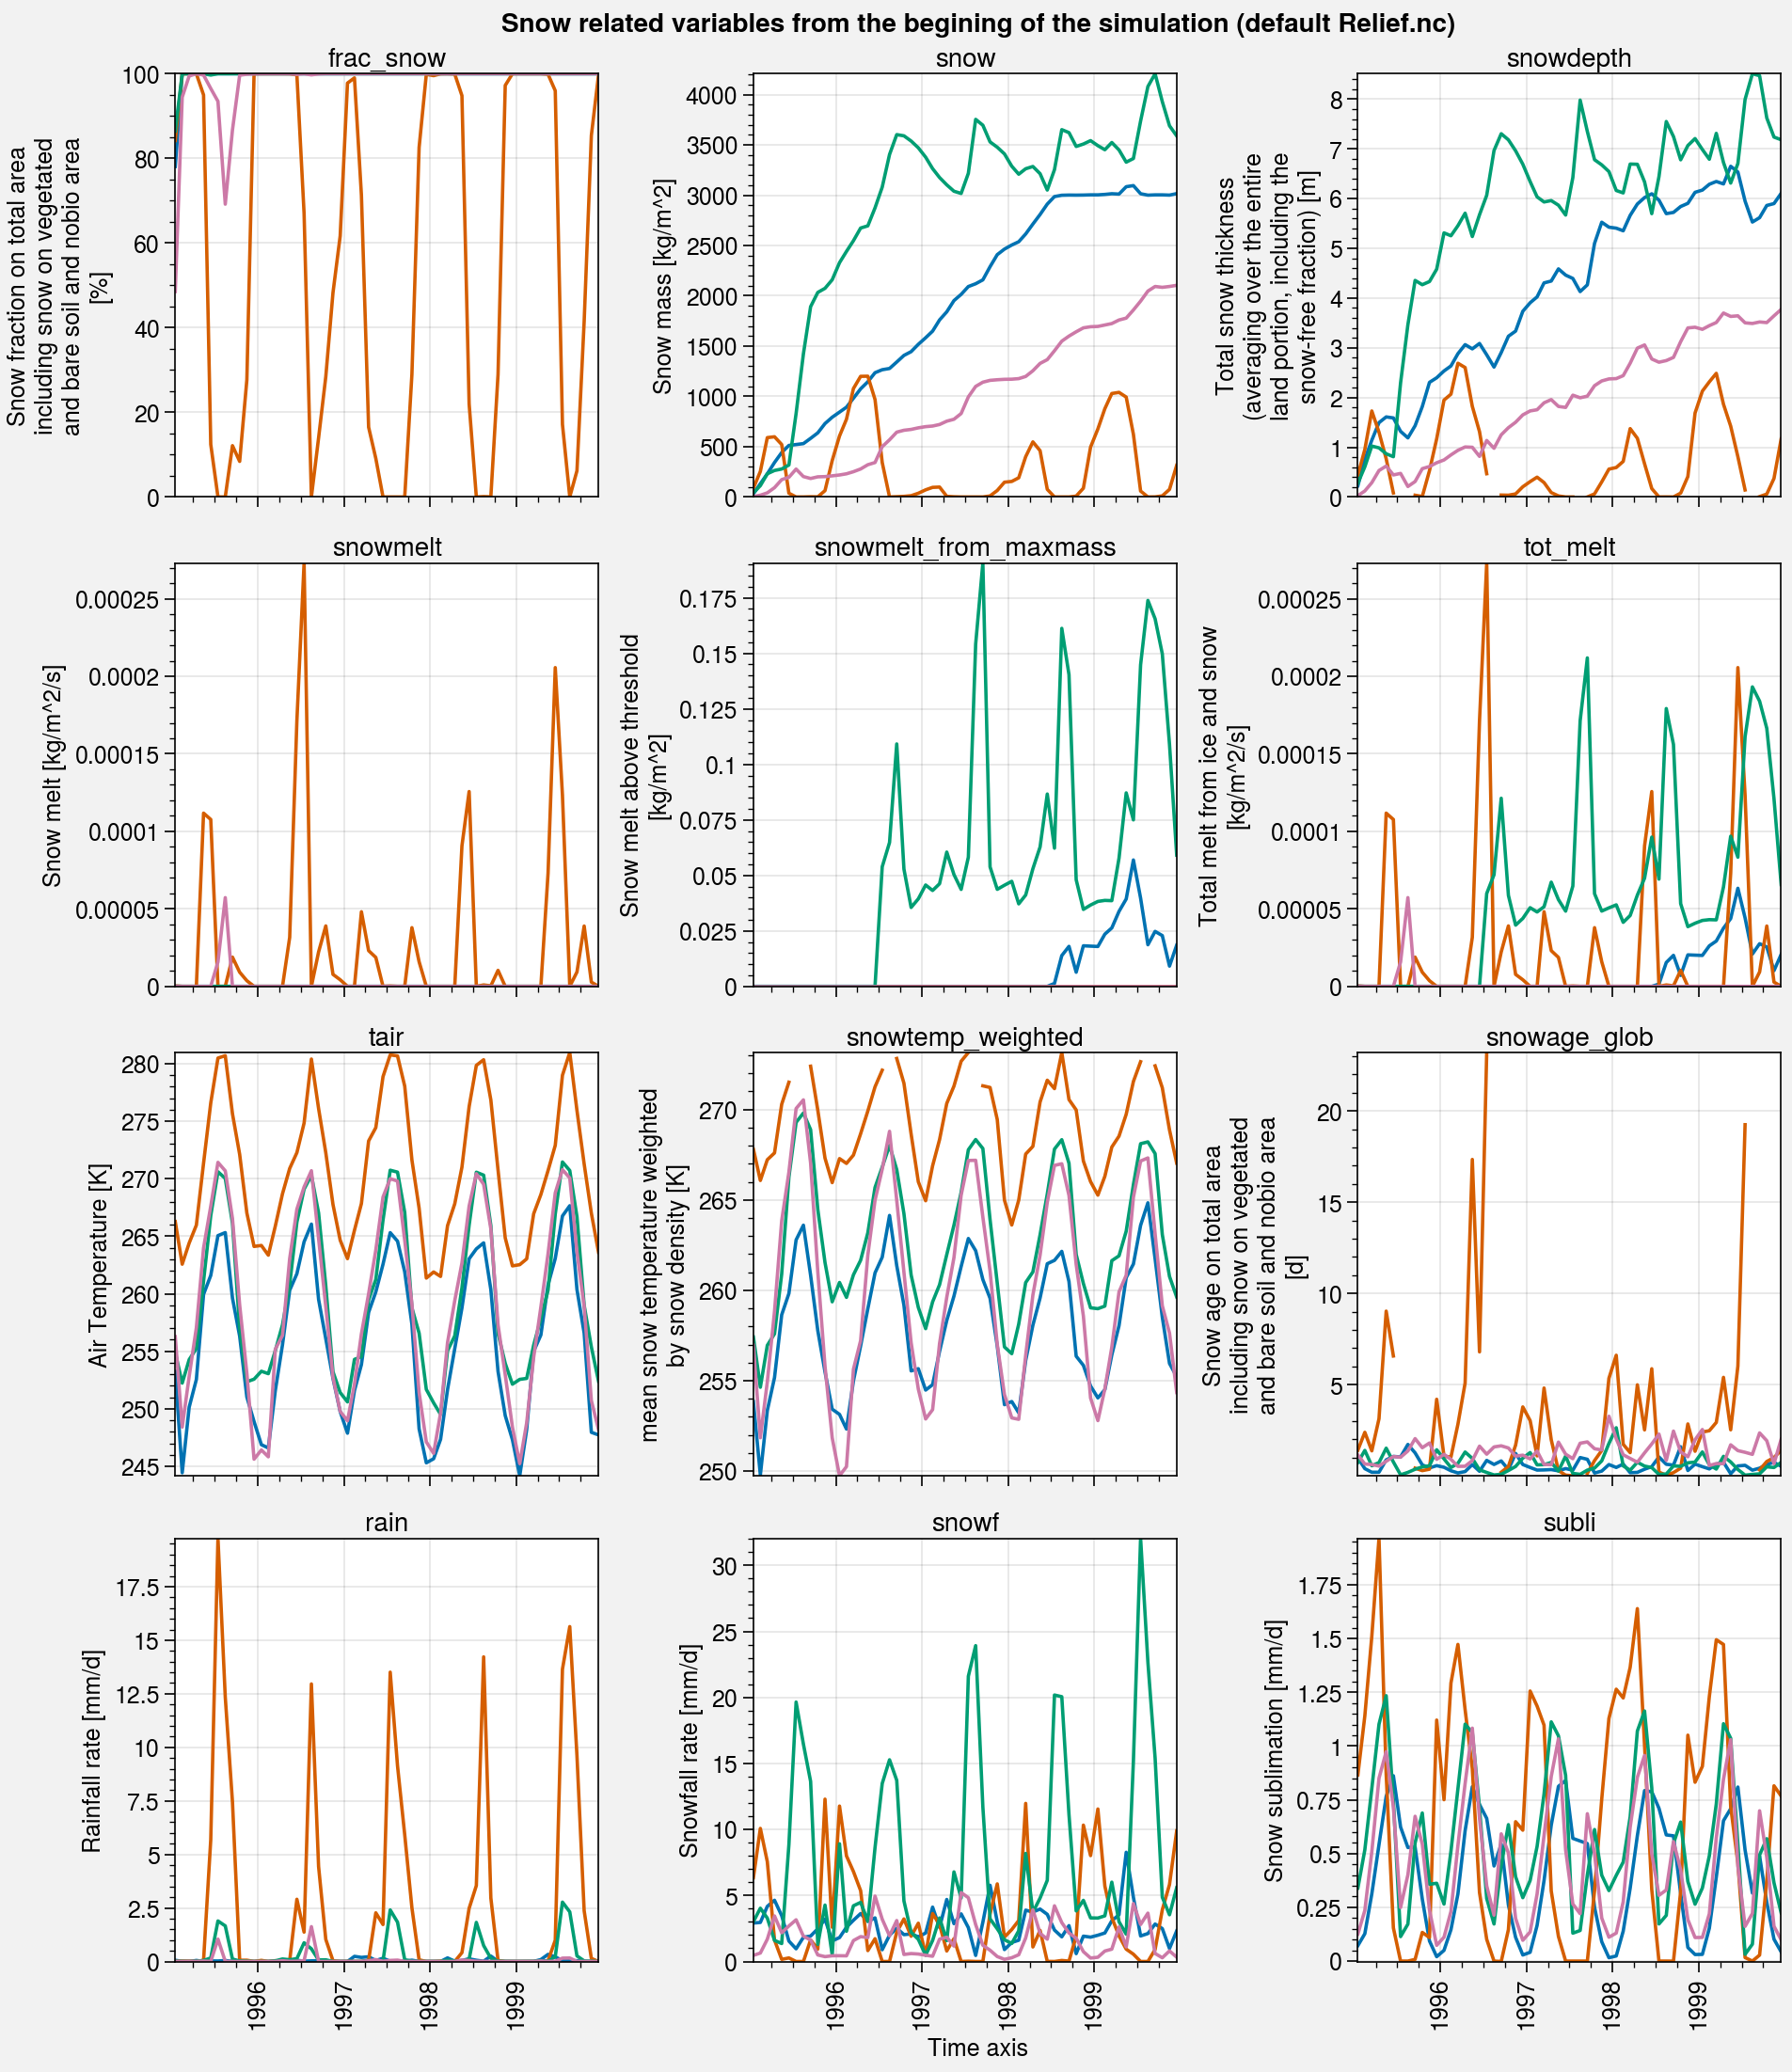

In [23]:
n = len(lat_100)
variables = [
    'frac_snow','snow', 'snowdepth', 
    'snowmelt', 'snowmelt_from_maxmass', 'tot_melt',
    'tair', 'snowtemp_weighted', 'snowage_glob', 
    'rain', 'snowf', 'subli'
]

f, axs = plot.subplots(ncols=3, nrows=4, sharey=0)

hs = []
for k, variable in enumerate(variables):
    for i in range(n):
        ds_HMA[variable].sel(lat=lat_100[i], lon=lon_100[i], time_counter=slice('1995', '1999')).plot(ax=axs[k], label='test')
        axs[k].format(title=variable)
        
axs.format(suptitle='Snow related variables from the begining of the simulation (default Relief.nc)')

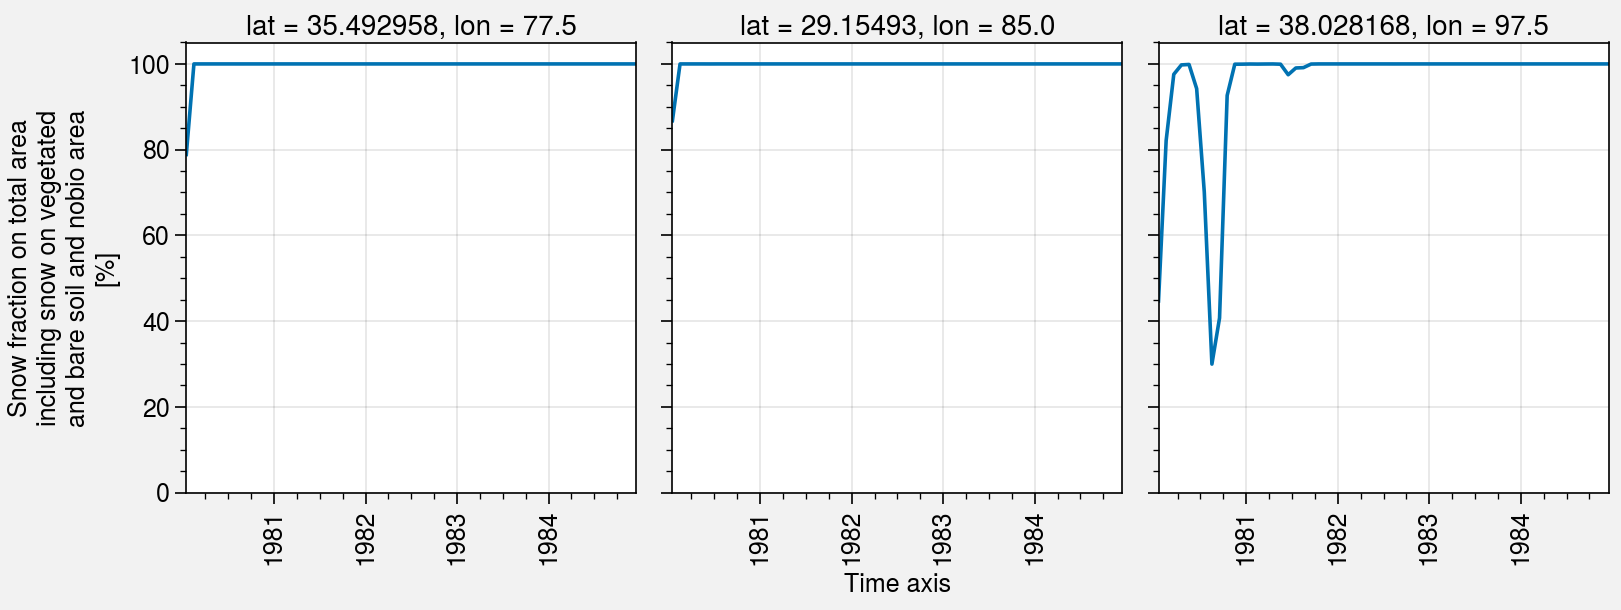

In [110]:
n = len(lat_100)

f, axs = plot.subplots(ncols=n, nrows=1)

for i in range(n):
    ds_HMA.frac_snow.sel(lat=lat_100[i], lon=lon_100[i], time_counter=slice('1980', '1984')).plot(ax=axs[i])
    
axs.format(ylim=(0,105))

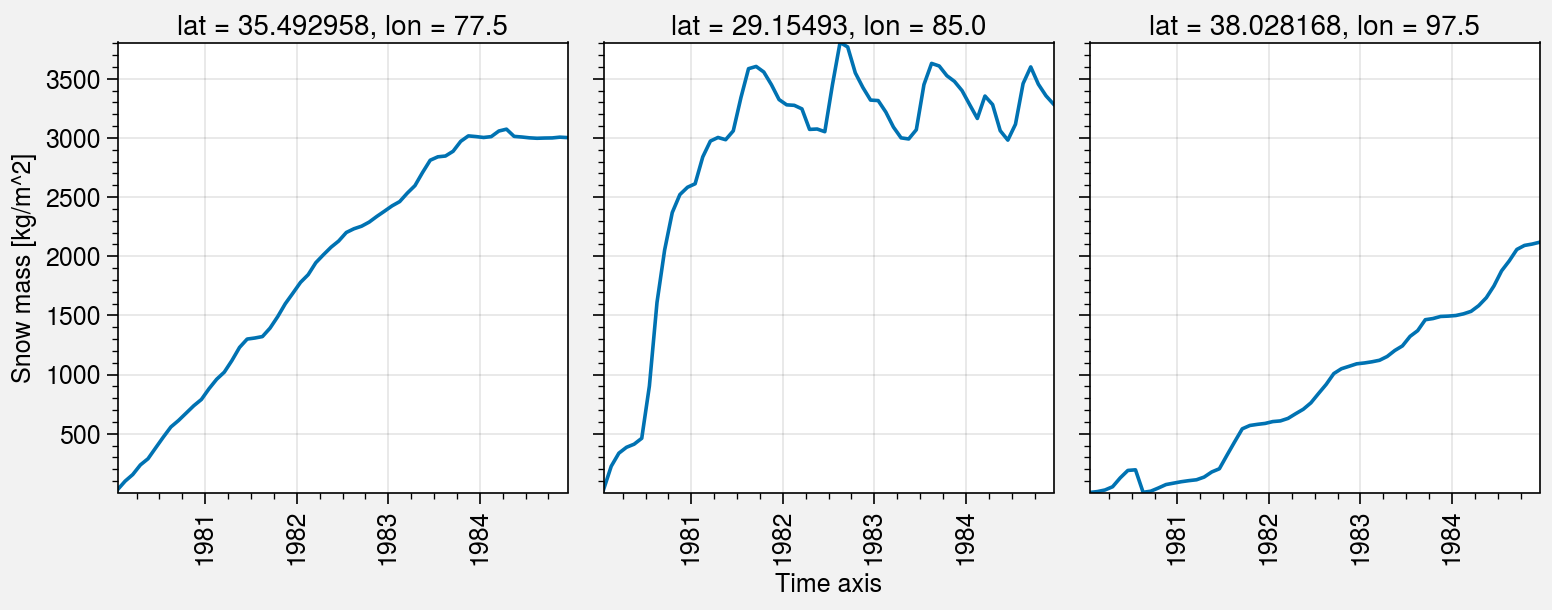

In [121]:
f, axs = plot.subplots(ncols=n, nrows=1)
for i in range(n):
    ds_HMA.snow.sel(lat=lat_100[i], lon=lon_100[i], time_counter=slice('1980', '1984')).plot(ax=axs[i])

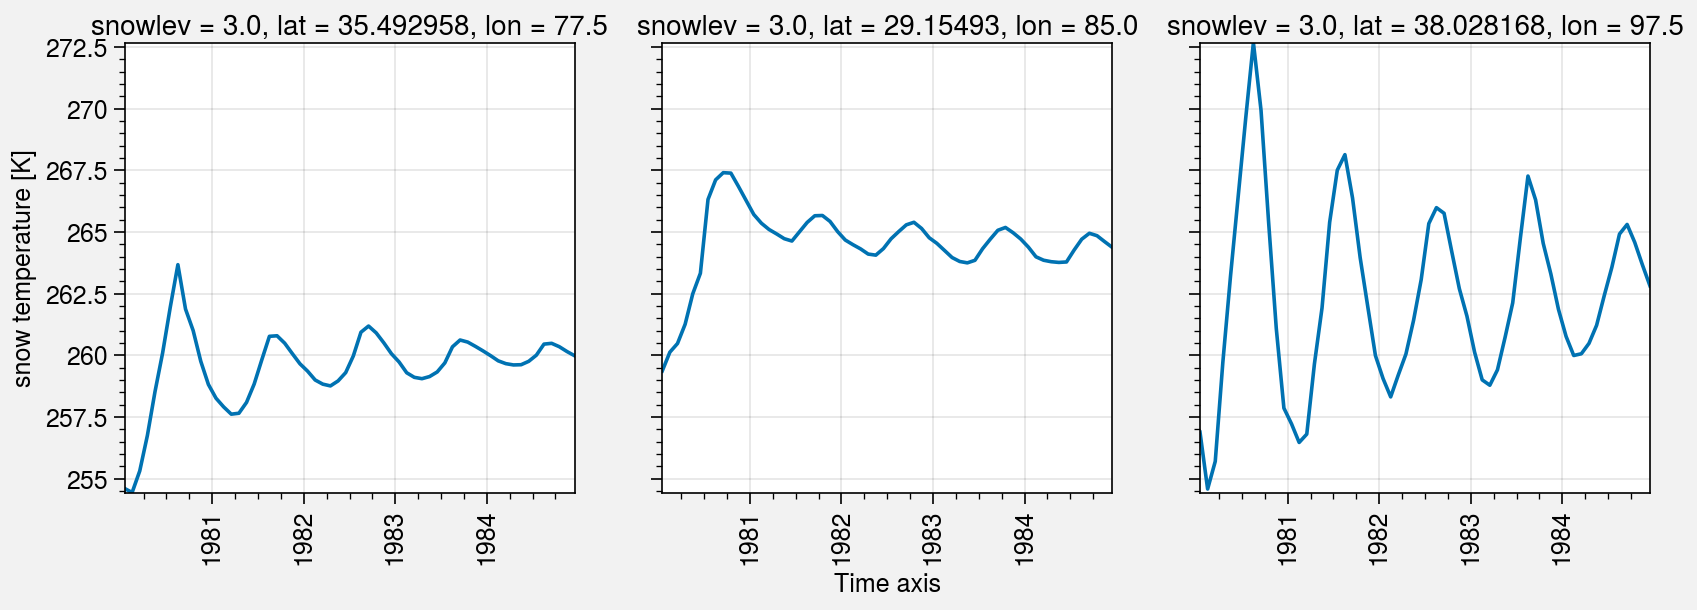

In [169]:
f, axs = plot.subplots(ncols=n, nrows=1)
for i in range(n):
    ds_HMA.snowtemp.sel(snowlev=3.0, lat=lat_100[i], lon=lon_100[i], time_counter=slice('1980', '1984')).plot(ax=axs[i])

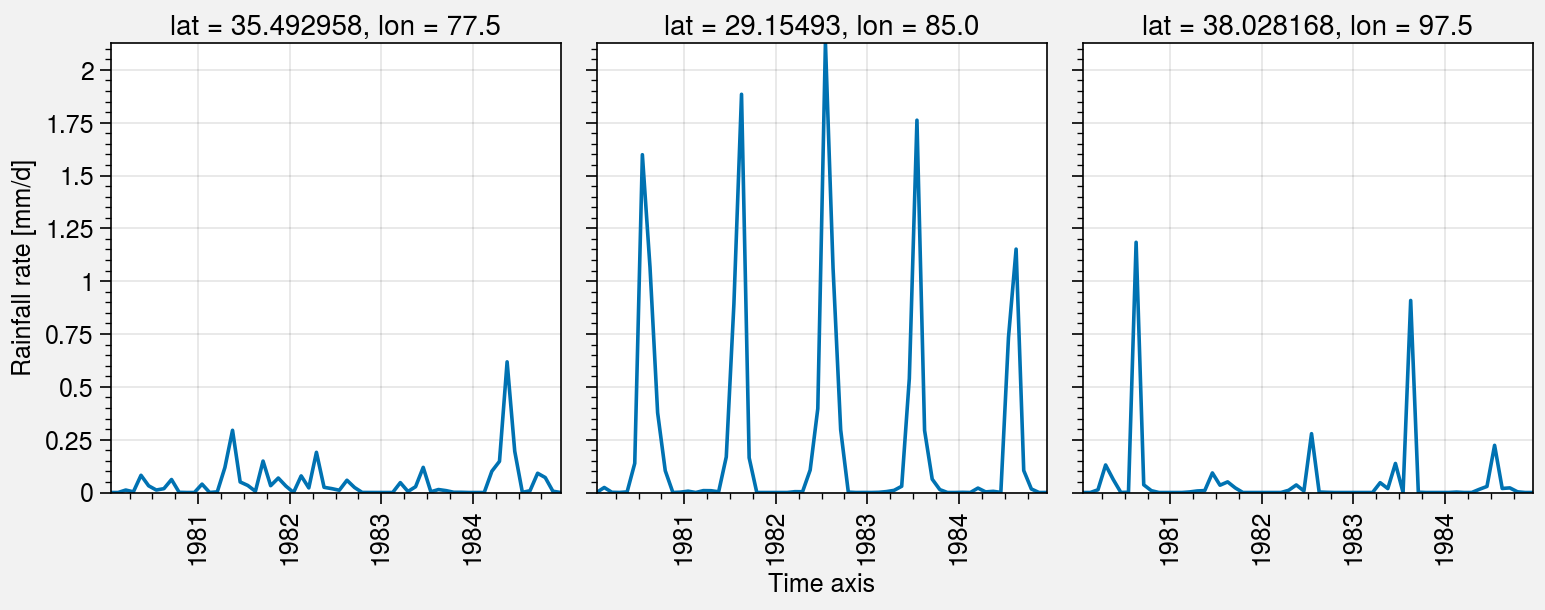

In [125]:
f, axs = plot.subplots(ncols=n, nrows=1)
for i in range(n):
    ds_HMA.rain.sel(lat=lat_100[i], lon=lon_100[i], time_counter=slice('1980', '1984')).plot(ax=axs[i])

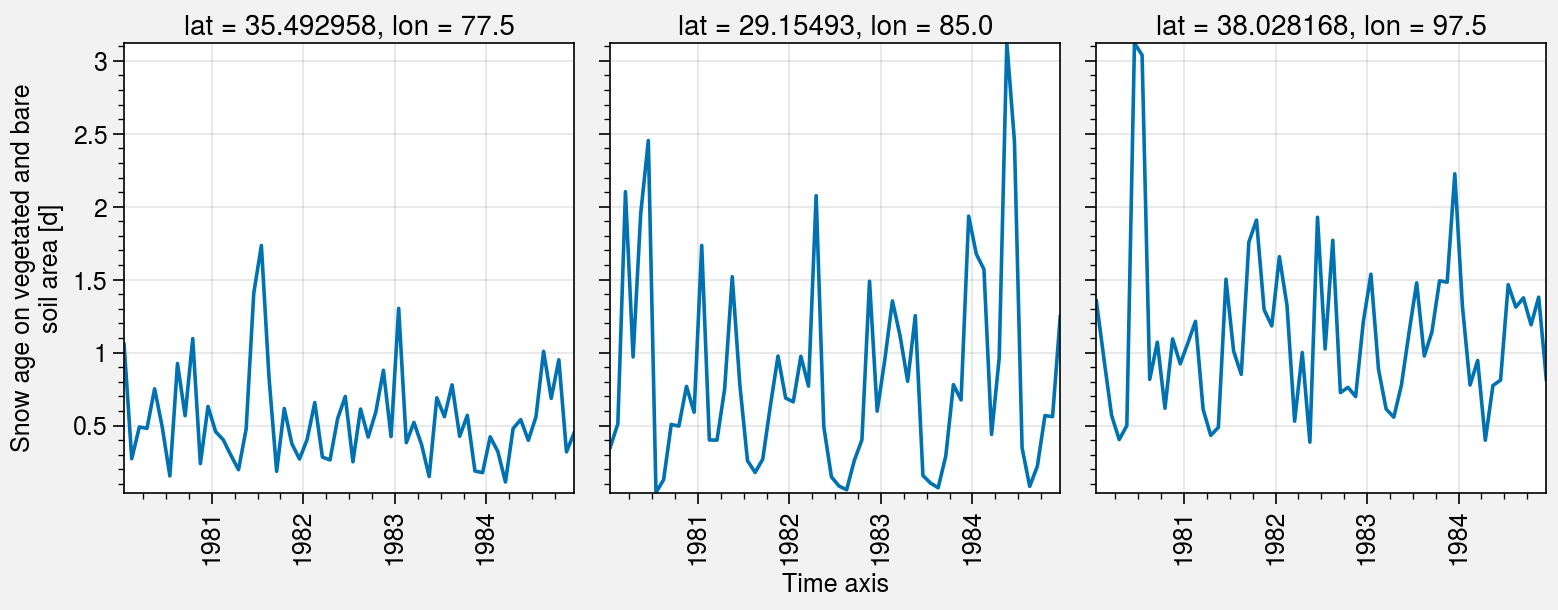

In [126]:
f, axs = plot.subplots(ncols=n, nrows=1)
for i in range(n):
    ds_HMA.snowage.sel(lat=lat_100[i], lon=lon_100[i], time_counter=slice('1980', '1984')).plot(ax=axs[i])

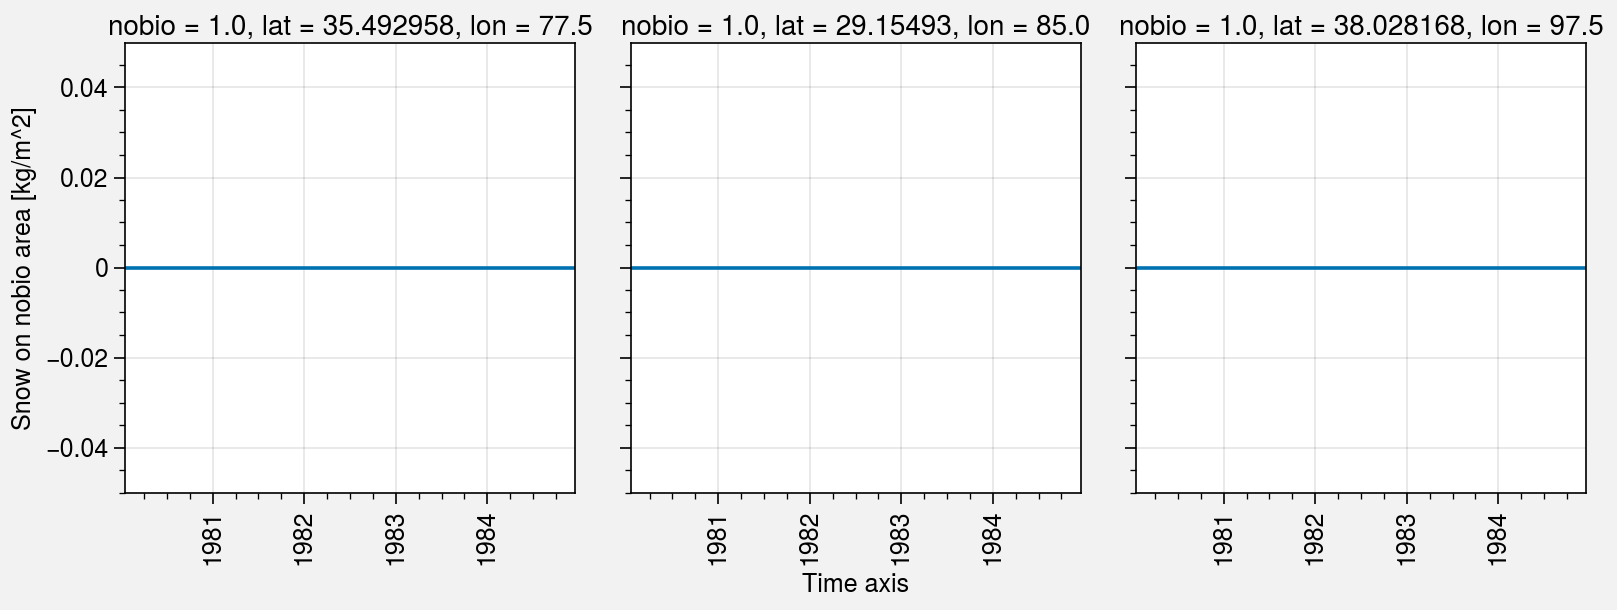

In [128]:
f, axs = plot.subplots(ncols=n, nrows=1)
for i in range(n):
    ds_HMA.snownobio.sel(lat=lat_100[i], lon=lon_100[i], time_counter=slice('1980', '1984')).plot(ax=axs[i])